# Формирование выборки

In [ ]:
import numpy as np

Константы:

In [ ]:
N = 500
M = 20
eps_0 = 1

In [ ]:
step = 0.0001
max_x = 1
min_x = -1

Генерируем аргументы ${x^{(i)}}_1^N$


In [ ]:
#np.random.seed(21210)
x = np.random.uniform(min_x, max_x, N)

Функции

In [ ]:
min_poly = -3
max_poly = 3

a = np.random.uniform(min_poly, max_poly)
b = np.random.uniform(min_poly, max_poly)
c = np.random.uniform(min_poly, max_poly)
d = np.random.uniform(min_poly, max_poly)
print(f'Полином f1: {a}*x^3 + {b}*x^2 + {c}*x + {d}')

def f1(x):
    return a*x**3 + b*x**2 + c*x + d

def f2(x):
    return x * np.sin(2 * np.pi * x)

Полином f1: -2.0155247542384966*x^3 + 0.7316296032428578*x^2 + 1.6729240407958175*x + 1.7846594586053977


Находим $y^{(i)} = f(x^{(i)}) + eps$

In [ ]:
y = np.zeros(shape=(N), dtype='f')

for i in range(N):
    eps = np.random.normal(0, eps_0)   # нормальное распределение
    #eps = np.random.uniform(-eps_0, eps_0) # равномерное распределение
    y[i] = f1(x[i]) + eps

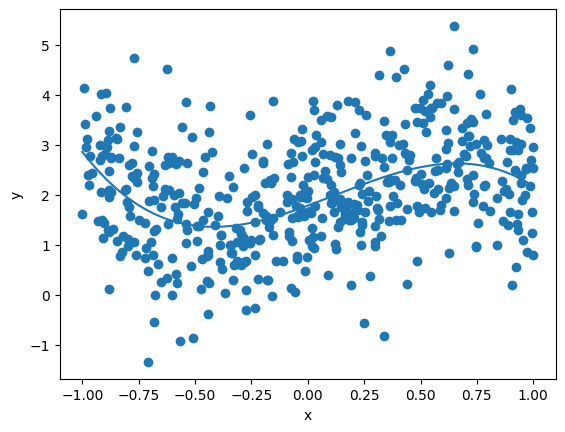

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

xx = np.arange(min_x, max_x, step)

yy = f1(xx)

plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Полиномиальная регрессия

In [ ]:
A = np.zeros(shape=(M, M))
b = np.zeros(shape=(M))

In [ ]:
def element(i, j):
  sum = 0
  for k in range(0, N):
    sum += x[k]**(i+j)

  return sum

In [ ]:
def right_hand_side(i):
  sum = 0

  for k in range(0, N):
    sum += y[k]*(x[k]**i)

  return sum

In [ ]:
for i in range(0, M):
  for j in range(0, M):
    A[i][j] = element(i, j)

for i in range(0, M):
  b[i] = right_hand_side(i)

Получаем вектор коэффицентов

In [ ]:
import scipy
from scipy.linalg import solve

c = solve(A, b)

In [ ]:
def CalcPolynomial(x):
    sum = 0
    for i in range(0, M):
        sum += c[i]*x**i

    return sum

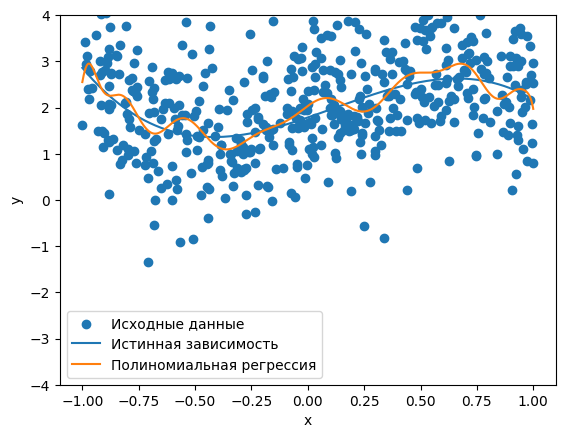

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Исходные данные')
plt.plot(xx, yy, label='Истинная зависимость')
plt.plot(xx, CalcPolynomial(xx), label='Полиномиальная регрессия')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-4, 4)
plt.show()